In [ ]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import pandas as pd



In [ ]:
data=pd.read_csv("Mushroom.csv",sep=',',names=["class","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"])

In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# **Converting the categorical data to numerical**

In [ ]:
labels=data[["class","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"]]

In [ ]:
from sklearn.preprocessing import LabelEncoder
for label in labels:
  encoder=LabelEncoder()
  encoder.fit(data[label])
  data[label]=encoder.transform(data[label])


In [ ]:
data.shape

(8124, 23)

In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [ ]:
X=data.drop(["class"],axis=1)
Y=data["class"]

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain_full,X_test,Ytrain_full,Y_test=train_test_split(X,Y,test_size=0.20)
X_train,X_valid,Y_train,Y_valid=train_test_split(Xtrain_full,Ytrain_full,test_size=0.20)


In [ ]:
Xtrain_full.shape

(6499, 22)

In [ ]:
Ytrain_full.shape


(6499,)

In [ ]:
X_test.shape

(1625, 22)

In [ ]:
Y_test.shape

(1625,)

In [ ]:
X_train.shape

(5199, 22)

# Creating a Sequential Model

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, activation="relu",input_dim=22,))
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.Dense(20,activation="relu"))
model.add(keras.layers.Dense(10, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                736       
_________________________________________________________________
dense_22 (Dense)             (None, 15)                495       
_________________________________________________________________
dense_23 (Dense)             (None, 20)                320       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                210       
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.layers[0].name
model.layers[1].name
model.layers[2].name

'dense_23'

In [ ]:
w,b=model.layers[2].get_weights()

In [ ]:
w.shape

(15, 20)

In [ ]:
b.shape

(20,)

In [ ]:
#model.compile(loss='loss_categorical_crossentropy',optimizer="sgd",metrics=["accuracy"])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc']) 


In [ ]:
fithistory=model.fit(Xtrain_full,Ytrain_full,validation_data=(X_valid,Y_valid),epochs=30)


Epoch 1/30
204/204 [==============================] - 0s 2ms/step - loss: 0.9967 - acc: 0.5192 - val_loss: 0.6913 - val_acc: 0.4869
Epoch 2/30
204/204 [==============================] - 0s 2ms/step - loss: 0.5300 - acc: 0.6064 - val_loss: 0.2903 - val_acc: 0.8738
Epoch 3/30
204/204 [==============================] - 0s 2ms/step - loss: 0.2388 - acc: 0.9028 - val_loss: 0.1820 - val_acc: 0.9223
Epoch 4/30
204/204 [==============================] - 0s 2ms/step - loss: 0.1646 - acc: 0.9258 - val_loss: 0.1418 - val_acc: 0.9392
Epoch 5/30
204/204 [==============================] - 0s 2ms/step - loss: 0.1165 - acc: 0.9371 - val_loss: 0.0890 - val_acc: 0.9454
Epoch 6/30
204/204 [==============================] - 0s 2ms/step - loss: 0.0853 - acc: 0.9432 - val_loss: 0.0665 - val_acc: 0.9562
Epoch 7/30
204/204 [==============================] - 0s 2ms/step - loss: 0.0671 - acc: 0.9475 - val_loss: 0.0559 - val_acc: 0.9562
Epoch 8/30
204/204 [==============================] - 0s 2ms/step - loss: 0.

In [ ]:
fithistory.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [ ]:
fithistory.params

{'epochs': 30, 'steps': 204, 'verbose': 1}

In [ ]:
fithistory.history["acc"]

[0.519156813621521,
 0.6064009666442871,
 0.9027542471885681,
 0.9258347153663635,
 0.9370672702789307,
 0.9432220458984375,
 0.9475303888320923,
 0.9479920268058777,
 0.947376549243927,
 0.9484536051750183,
 0.9487613439559937,
 0.949222981929779,
 0.949222981929779,
 0.9495307207107544,
 0.9495307207107544,
 0.9487613439559937,
 0.9498384594917297,
 0.9498384594917297,
 0.9498384594917297,
 0.9498384594917297,
 0.9498384594917297,
 0.949992299079895,
 0.9498384594917297,
 0.9498384594917297,
 0.949992299079895,
 0.9498384594917297,
 0.9498384594917297,
 0.949069082736969,
 0.9498384594917297,
 0.9498384594917297]

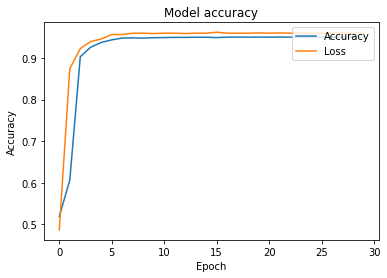

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(fithistory.history['acc'])
plt.plot(fithistory.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper right')
plt.show()

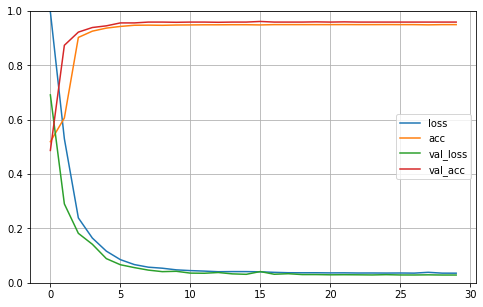

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(fithistory.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
prediction_features=model.predict(X_test)

In [ ]:
prediction_features

array([[9.9983561e-01, 5.3802417e-08, 2.8398697e-08, ..., 7.6740534e-09,
        1.1670991e-09, 2.2119670e-08],
       [2.3150902e-12, 9.5815015e-01, 8.3245493e-16, ..., 6.8880905e-16,
        6.8130830e-18, 1.6064769e-14],
       [1.0000000e+00, 1.9440055e-04, 2.2878700e-08, ..., 5.4711634e-08,
        1.1589409e-06, 1.5533089e-08],
       ...,
       [8.6070591e-18, 9.8434347e-01, 4.4700597e-16, ..., 2.3644507e-16,
        4.2153077e-19, 4.2845287e-13],
       [9.9572372e-01, 1.1750460e-03, 2.6703816e-08, ..., 2.9051034e-08,
        2.2293539e-08, 1.2329333e-08],
       [9.9308872e-01, 2.7772925e-08, 8.0075430e-10, ..., 6.7553729e-10,
        3.9811130e-11, 2.6354763e-09]], dtype=float32)

In [ ]:
a=prediction_features.tolist()
a

[[0.9998356103897095,
  5.3802416744019865e-08,
  2.8398696727549577e-08,
  1.289682138860826e-09,
  1.0605195610580154e-09,
  3.1149500756555426e-08,
  7.308641158942919e-08,
  7.674053392747737e-09,
  1.1670990840428885e-09,
  2.211966965148804e-08],
 [2.3150901768548282e-12,
  0.9581501483917236,
  8.324549278969026e-16,
  5.868307277829068e-14,
  2.0200634649183632e-15,
  4.730786543894899e-17,
  2.2934030298763994e-14,
  6.888090455917692e-16,
  6.813083041460363e-18,
  1.6064769279384647e-14],
 [1.0,
  0.00019440054893493652,
  2.2878699823536408e-08,
  8.823599628726697e-10,
  1.2594378517860605e-07,
  8.375323545806168e-08,
  1.0894241952996708e-08,
  5.471163433412585e-08,
  1.1589409041334875e-06,
  1.553308948132326e-08],
 [0.9999997615814209,
  0.0003096163272857666,
  4.593048856804671e-07,
  2.600772219807368e-08,
  7.349575525950058e-07,
  8.425727173744235e-07,
  2.1204579070399632e-07,
  5.819345574309409e-07,
  4.646253273676848e-06,
  2.0823836166528054e-07],
 [8.481

In [ ]:
pred=[]
for i in a:
    if i[0]>i[1]:
        pred.append(0)
    else:
        pred.append(1)
        

In [ ]:
pred

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,


In [ ]:
model.evaluate(X_test,Y_test)

51/51 [==============================] - 0s 1ms/step - loss: 0.0288 - acc: 0.9594


[0.028804544359445572, 0.9593846201896667]